# Problem 1

In [11]:
from matplotlib.pyplot import xlabel
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import axes3d

### 1a) 

Generate five bivariate instances for each of two normal distributions, with each distribution representing
a distinct class: N (μ1, Σ1) and N (μ2, Σ2). Let μ1 = [0, 0], μ2 = [1, 1], and both Σ1 and Σ2 be identity
matrices. Plot these instances on a Cartesian plane. Then, introduce an arbitrary linear decision boundary,
represented by wT x + w0. The boundary should efficiently differentiate between the two classes.

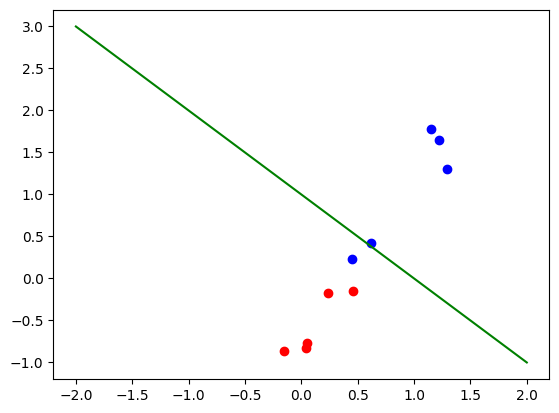

In [12]:

# Create Multivariate normal distributions
N_1 = multivariate_normal([0,0], cov=0.2)
N_2 = multivariate_normal([1,1], cov=0.2)

# Generating 5 random 2d samples for both normal distributions
X_1 = N_1.rvs(5)
X_2 = N_2.rvs(5)

# Plotting the samples on a plane
plt.scatter(X_1[:,0], X_1[:,1], color="red") # X_1[:,0] = x-coordinates, X_1[:,1] = y-coordinates
plt.scatter(X_2[:,0], X_2[:,1], color="blue")


# Plotting the line 
x =np.linspace(-2,2, 50) # Generates 50 equally spaced points between -2 and 2
y = 1 - x #  Calculating corresponding y-values for each x-value
# Plot the line
plt.plot(x,y, color="green")

### 1b)
Transform the Cartesian plane into a three-dimensional space by adding a z-axis, which represents the
output of the sigmoid function, ranging from (0, 1). Note that the linear decision boundary in the Cartesian
plane corresponds to the midpoint of 0.5 on the z-axis. The instances sampled from the N (μ1, Σ1)
distribution, which represents class 1, should yield a sigmoid output close to 0. Conversely, the instances
from the N (μ2, Σ2) distribution, representing class 2, should have a sigmoid output close to 1.

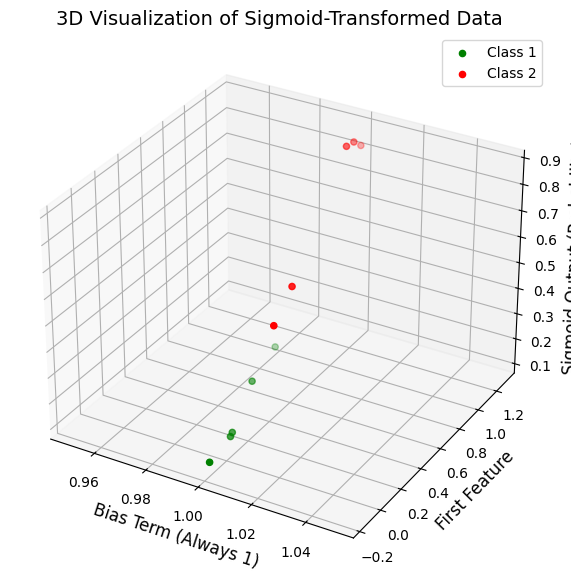

In [13]:

def sigmoid(z) :
  return 1/(1+np.exp(-z))

# Adding bias term to data
bias = np.ones((5,1)) # With 5 rows and one column

# Horizontally stacking the bias to the existing matrixes X_1 and X_2
X_1 = np.hstack((bias, X_1)) 
X_2 = np.hstack((bias, X_2))

# Decision boundary
# --> w[0] (-1) = the bias (intercept term)
# --> w[1] and the w[2] = weights corresponding to the two features of the data
w = np.array([-1, 1, 1])

# Compute sigmoid
# --> Basically converts all values from X_1 and X_2 to a number between 0 and 1
z_1 = sigmoid(X_1 @ w.T)
z_2 = sigmoid(X_2 @ w.T)

# Plotting as 3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Plotting the scatter points
ax.scatter(X_1[:,0], X_1[:,1], z_1, color="green", label="Class 1")
ax.scatter(X_2[:,0], X_2[:,1], z_2, color="red", label="Class 2")

# Adding labels for the axes
ax.set_xlabel('Bias Term (Always 1)', fontsize=12)
ax.set_ylabel('First Feature', fontsize=12)
ax.set_zlabel('Sigmoid Output (Probability)', fontsize=12)

# Adding a title to the plot
ax.set_title('3D Visualization of Sigmoid-Transformed Data', fontsize=14)

# Adding a legend to differentiate between the two classes
ax.legend()

# Show the plot
plt.show()